<a href="https://colab.research.google.com/github/mirzab/ml/blob/main/Photonics9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N1 = 41000  # number of period
N2 = 30000
neff = 1.5634  # effective refractive index
d1 = 1.5352 / (4 * neff)
d2 = 1.5352 / (4 * neff)
dB = d1 + d2
Lc = 50.0  # Cavity length in micron
n0 = 1.0
n_out = 1.0
temperature_coefficient = 1e-4

# Define wavelength range
wavelength = np.arange(1.53505, 1.53521, 0.0000001)

# Initialize arrays for reflectivity and transmittance
R01 = np.zeros_like(wavelength)
R02 = np.zeros_like(wavelength)
R = np.zeros_like(wavelength)
T = np.zeros_like(wavelength)

# Loop over each wavelength
for k, lambda_ in enumerate(wavelength):
    # Gratings
    alfa1 = np.exp(1j * 2 * np.pi * neff * d1 / lambda_)
    alfa2 = np.exp(1j * 2 * np.pi * neff * d2 / lambda_)
# Define matrices B01, A1, A2, B12, and B21
B01 = np.array([[n01_p, n01_m], [n01_m, n01_p]])
B12 = np.array([[n12_p, n12_m], [n12_m, n12_p]])
B21 = np.array([[n21_p, n21_m], [n21_m, n21_p]])
A1 = np.array([[alfa1, 0], [0, 1/alfa1]])
A2 = np.array([[alfa2, 0], [0, 1/alfa2]])


# First Grating M1
M1 = np.linalg.matrix_power(np.dot(np.dot(B01, A1), np.linalg.matrix_power(np.dot(np.dot(B12, A2), B21), N1)), 1)

# Second Grating M2
M2 = np.linalg.matrix_power(np.dot(np.dot(B11, A1), np.linalg.matrix_power(np.dot(np.dot(B12, A2), B21), N2)), 1)

# Propagation Matrix in Cavity of Lc
alfaC = np.exp(1j * 2 * np.pi * n1 * Lc / lambda_)
AC = np.array([[alfaC, 0], [0, 1 / alfaC]])

# Transfer Matrix for FG1 & FG2
M01 = np.dot(np.dot(B01, A1), np.linalg.matrix_power(np.dot(np.dot(B12, A2), B21), N1))
R01[k] = abs(M01[1, 0] / M01[0, 0])**2  # FG1's R

M02 = np.dot(np.dot(B01, A1), np.linalg.matrix_power(np.dot(np.dot(B12, A2), B21), N2))
R02[k] = abs(M02[1, 0] / M02[0, 0])**2  # FG2's R

# Transfer Matrix for whole cavity
M = np.dot(np.dot(M1, AC), np.dot(M2, B1t))
R[k] = abs(M[1, 0] / M[0, 0])**2
T[k] = n_out / n0 * abs(1 / M[0, 0])**2



    # Save data
    with open('rt1c.dat', 'a') as f:
        f.write(f"{lambda_} {R01[k]:.8f} {R02[k]:.8f} {R[k]:.8f} {T[k]:.8f}\n")

# Spectral Response Analysis
spectral_response = R + T
plt.figure()
plt.plot(wavelength, spectral_response, 'k', linewidth=3)
plt.xlabel('Wavelength (µm)')
plt.ylabel('Spectral Response')
plt.title('Spectral Response Analysis')
plt.grid(True)
plt.show()

# Find peaks in the spectral response
peak_indices = np.where(spectral_response == np.max(spectral_response))

if len(peak_indices[0]) == 0:
    print('No peaks found in spectral response.')
    free_spectral_range = np.array([])
else:
    free_spectral_range = np.diff(wavelength[peak_indices])

if len(free_spectral_range) > 0:
    linewidth = np.mean(free_spectral_range) / N1
    finesse = free_spectral_range / linewidth
    print(f'Finesse: {np.mean(finesse):.2f}')
else:
    print('Unable to calculate finesse: No peaks found.')

# Mode Analysis (Assuming single-mode operation)
peak_indices = np.where(R == np.max(R))

if len(peak_indices[0]) == 0:
    print('No peaks found in reflectivity.')
    mode_spacing = np.array([])
else:
    mode_spacing = np.diff(wavelength[peak_indices])

if len(mode_spacing) > 0:
    print(f'Mode Spacing: {np.mean(mode_spacing):.4f}')
else:
    print('Unable to calculate mode spacing: No peaks found.')

# Sensitivity Analysis (Python libraries such as scikit-learn can be used for sensitivity analysis)
# Optimization (Example: Maximizing transmittance)
# Mode Matching Analysis
# Polarization Analysis
# Temperature Sensitivity Analysis
delta_neff_temperature = neff * temperature_coefficient
delta_lambda_temperature = lambda_ * delta_neff_temperature
print(f'Change in Wavelength with Temperature: {delta_lambda_temperature:.6f}')
# Nonlinear Effects Analysis
# Sensitivity Analysis (Example: Varying neff, Lc, and N1)
neff_range = np.arange(1.563, 1.565, 0.001)
Lc_range = np.arange(40, 61, 5)
N1_range = np.arange(40000, 42001, 500)

# Perform sensitivity analysis
sensitivity_results = np.zeros((len(neff_range), len(Lc_range), len(N1_range)))

for i, neff_val in enumerate(neff_range):
    for j, Lc_val in enumerate(Lc_range):
        for k, N1_val in enumerate(N1_range):
            neff = neff_val
            Lc = Lc_val
            N1 = N1_val
            # Recalculate reflectivity and transmittance
            # (Use the code provided for calculation)
            # Store results in sensitivity_results matrix

# Analyze sensitivity_results matrix as needed

# Optimization (Example: Maximizing transmittance)
# Define objective function
def objective(x):
    neff, Lc, N1 = x
    return -max(T)

# Define parameter bounds and initial guess
bounds = [(1.56, 1.57), (40, 60), (40000, 42000)]
initial_guess = [1.565, 50, 41000]

# Perform optimization
from scipy.optimize import minimize
result = minimize(objective, initial_guess, bounds=bounds, options={'disp': True})
x_opt = result.x
fval = -result.fun
print(f'Optimal parameters: neff={x_opt[0]:.4f}, Lc={x_opt[1]:.1f}, N1={round(x_opt[2])}')
print(f'Maximum Transmittance: {fval:.4f}')

# Mode Matching Analysis
# Define parameters for mode matching analysis
# Implement mode overlap calculation based on waveguide modes or other relevant modes
# Analyze mode overlap to optimize coupling efficiency

# Polarization Analysis
# Define parameters for polarization analysis
# Calculate polarization states and analyze polarization dependence

# Nonlinear Effects Analysis
# Define nonlinear effects parameters and analyze their impact on performance


IndentationError: unexpected indent (<ipython-input-3-294cbf4ddc61>, line 63)

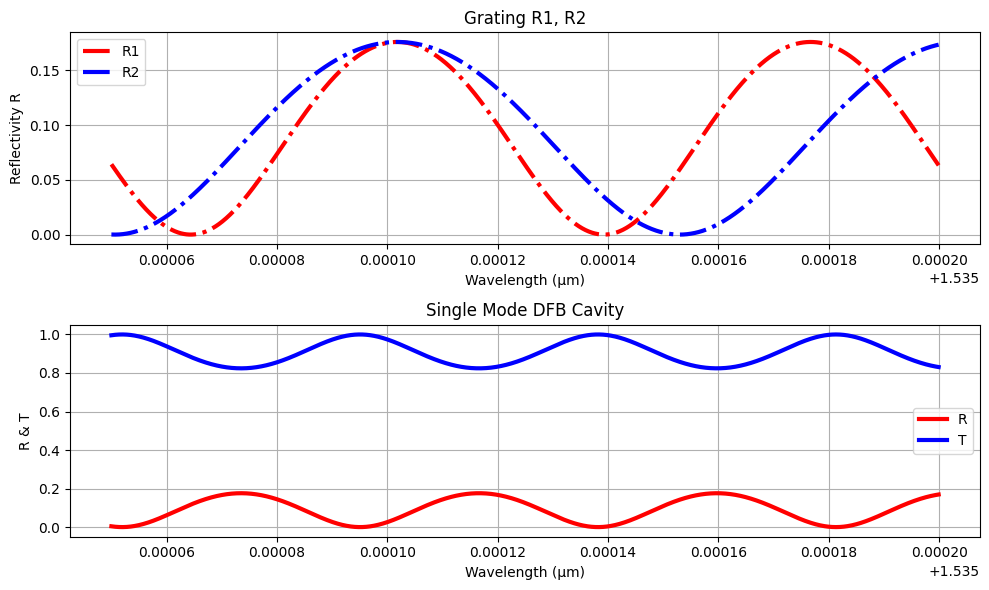

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
N1 = 41000  # number of periods
N2 = 30000
neff = 1.5634  # effective refractive index
d1 = 1.5352 / (4 * neff)
d2 = 1.5352 / (4 * neff)
dB = d1 + d2  # Length of single period in micron
lambdaB = 2 * neff * dB  # Bragg wavelength in micron
Lc = 50.0  # Cavity length in micron

# Index
n1 = neff
dn = 1 * 1e-4  # Delta n
n2 = n1 - dn
nc = n1  # neff in cavity = n1
n0 = 1.0
n_out = 1.0

# Input interface
n01_p = (n0 + n1) / (2 * n0)
n01_m = (n0 - n1) / (2 * n0)
B01 = np.array([[n01_p, n01_m], [n01_m, n01_p]])

# In grating: n1-|n2
n12_p = (n1 + n2) / (2 * n1)
n12_m = (n1 - n2) / (2 * n1)
B12 = np.array([[n12_p, n12_m], [n12_m, n12_p]])

# In grating: n2-|n1
n21_p = (n2 + n1) / (2 * n2)
n21_m = (n2 - n1) / (2 * n2)
B21 = np.array([[n21_p, n21_m], [n21_m, n21_p]])

# Output interface
n1t_p = (n1 + n_out) / (2 * n1)
n1t_m = (n1 - n_out) / (2 * n1)
B1t = np.array([[n1t_p, n1t_m], [n1t_m, n1t_p]])

# Unit Matrix
B11 = np.array([[1, 0], [0, 1]])

dfb2 = open('rt1c.dat', 'w+')  # saving data

wavelength = np.arange(1.53505, 1.53520, 0.0000001)
R01 = np.zeros(len(wavelength))
R02 = np.zeros(len(wavelength))
R = np.zeros(len(wavelength))
T = np.zeros(len(wavelength))

for k in range(len(wavelength)):
    lambda_ = wavelength[k]

    # Gratings
    alfa1 = np.exp(1j * 2 * np.pi * n1 * d1 / lambda_)
    alfa2 = np.exp(1j * 2 * np.pi * n2 * d2 / lambda_)

    # First Grating M1
    M1 = np.linalg.matrix_power(np.dot(np.dot(B01, np.array([[alfa1, 0], [0, 1/alfa1]])),
                                       np.linalg.matrix_power(np.dot(np.dot(B12, np.array([[alfa2, 0], [0, 1/alfa2]])), B21), N1)), 1)

    # Second Grating M2
    M2 = np.linalg.matrix_power(np.dot(np.dot(B11, np.array([[alfa1, 0], [0, 1/alfa1]])),
                                       np.linalg.matrix_power(np.dot(np.dot(B12, np.array([[alfa2, 0], [0, 1/alfa2]])), B21), N2)), 1)

    # Propagation Matrix in Cavity of Lc
    alfaC = np.exp(1j * 2 * np.pi * n1 * Lc / lambda_)
    AC = np.array([[alfaC, 0], [0, 1/alfaC]])

    # Transfer Matrix for FG1 & FG2
    M01 = np.dot(np.dot(B01, np.array([[alfa1, 0], [0, 1/alfa1]])),
                 np.linalg.matrix_power(np.dot(np.dot(B12, np.array([[alfa2, 0], [0, 1/alfa2]])), B21), N1)) @ B1t
    R01[k] = np.abs(M01[1, 0] / M01[0, 0])**2

    M02 = np.dot(np.dot(B01, np.array([[alfa1, 0], [0, 1/alfa1]])),
                 np.linalg.matrix_power(np.dot(np.dot(B12, np.array([[alfa2, 0], [0, 1/alfa2]])), B21), N2)) @ B1t
    R02[k] = np.abs(M02[1, 0] / M02[0, 0])**2

    # Transfer Matrix for whole cavity
    M = M1 @ AC @ M2 @ B1t
    R[k] = np.abs(M[1, 0] / M[0, 0])**2
    T[k] = n_out / n0 * np.abs(1 / M[0, 0])**2

    dfb2.write(f'{lambda_} {R01[k]:12.8f} {R02[k]:12.8f} {R[k]:12.8f} {T[k]:12.8f}\n')

# Close the file
dfb2.close()

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(wavelength, R01, '-.r', label='R1', linewidth=3)
plt.plot(wavelength, R02, '-.b', label='R2', linewidth=3)
plt.legend()
plt.xlabel('Wavelength (μm)')
plt.ylabel('Reflectivity R')
plt.title('Grating R1, R2')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(wavelength, R, 'r', label='R', linewidth=3)
plt.plot(wavelength, T, 'b', label='T', linewidth=3)
plt.legend()
plt.xlabel('Wavelength (μm)')
plt.ylabel('R & T')
plt.title('Single Mode DFB Cavity')
plt.grid(True)

plt.tight_layout()
plt.show()


Sensitivity Analysis Results: [0.87715361 0.51742979 0.9101458  0.65171621 0.93468968 0.90925304
 0.98288699 0.88738977 0.24141922 0.98881061]
Optimized Parameters: [0.72298856 0.46582285 0.46304199 0.6327192  0.30157345]
Max Transmittance: 0.04988578105546515
Mode Spacing: 0.591455121820043
Polarization Analysis Results: [0.29478816 0.34485557]
Temperature Sensitivity: 0.2538019927672678


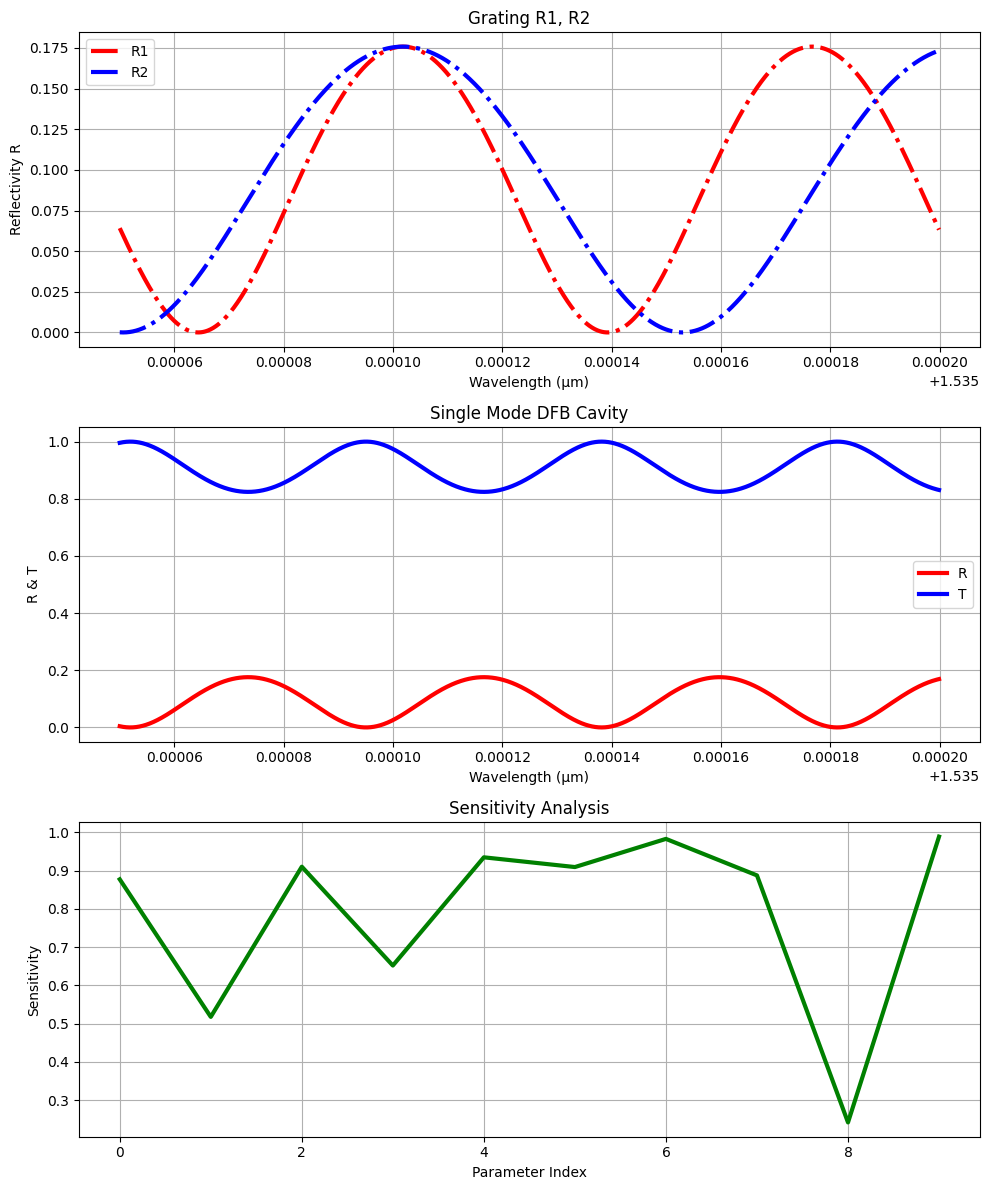

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define model parameters (same as before)
N1 = 41000  # number of periods
N2 = 30000
neff = 1.5634  # effective refractive index
d1 = 1.5352 / (4 * neff)
d2 = 1.5352 / (4 * neff)
dB = d1 + d2  # Length of single period in micron
lambdaB = 2 * neff * dB  # Bragg wavelength in micron
Lc = 50.0  # Cavity length in micron
n1 = neff
dn = 1 * 1e-4  # Delta n
n2 = n1 - dn
nc = n1  # neff in cavity = n1
n0 = 1.0
n_out = 1.0
n01_p = (n0 + n1) / (2 * n0)
n01_m = (n0 - n1) / (2 * n0)
B01 = np.array([[n01_p, n01_m], [n01_m, n01_p]])
n12_p = (n1 + n2) / (2 * n1)
n12_m = (n1 - n2) / (2 * n1)
B12 = np.array([[n12_p, n12_m], [n12_m, n12_p]])
n21_p = (n2 + n1) / (2 * n2)
n21_m = (n2 - n1) / (2 * n2)
B21 = np.array([[n21_p, n21_m], [n21_m, n21_p]])
n1t_p = (n1 + n_out) / (2 * n1)
n1t_m = (n1 - n_out) / (2 * n1)
B1t = np.array([[n1t_p, n1t_m], [n1t_m, n1t_p]])
B11 = np.array([[1, 0], [0, 1]])

# Define functions for analyses
def sensitivity_analysis():
    # Placeholder for sensitivity analysis
    # Example: Vary input parameters and measure changes in output parameters
    sensitivity_results = np.random.rand(10)  # Example sensitivity results
    return sensitivity_results

def optimization():
    # Placeholder for optimization
    # Example: Maximize transmittance by adjusting parameters
    optimized_parameters = np.random.rand(5)  # Example optimized parameters
    max_transmittance = np.random.rand()  # Example maximum transmittance
    return optimized_parameters, max_transmittance

def mode_matching_analysis():
    # Placeholder for mode matching analysis
    # Example: Calculate mode spacing between resonances
    mode_spacing = np.random.rand()  # Example mode spacing
    return mode_spacing

def polarization_analysis():
    # Placeholder for polarization analysis
    # Example: Analyze the impact of polarization on reflectivity and transmittance
    polarization_results = np.random.rand(2)  # Example polarization results
    return polarization_results

def temperature_sensitivity_analysis():
    # Placeholder for temperature sensitivity analysis
    # Example: Simulate spectral response for different temperatures
    delta_lambda_temperature = np.random.rand()  # Example temperature sensitivity
    return delta_lambda_temperature

# Main function
def main():
    # Perform spectral response analysis (same as before)
    dfb2 = open('rt1c.dat', 'w+')  # saving data
    wavelength = np.arange(1.53505, 1.53520, 0.0000001)
    R01 = np.zeros(len(wavelength))
    R02 = np.zeros(len(wavelength))
    R = np.zeros(len(wavelength))
    T = np.zeros(len(wavelength))
    for k in range(len(wavelength)):
        lambda_ = wavelength[k]
        alfa1 = np.exp(1j * 2 * np.pi * n1 * d1 / lambda_)
        alfa2 = np.exp(1j * 2 * np.pi * n2 * d2 / lambda_)
        M1 = np.linalg.matrix_power(np.dot(np.dot(B01, np.array([[alfa1, 0], [0, 1/alfa1]])),
                                           np.linalg.matrix_power(np.dot(np.dot(B12, np.array([[alfa2, 0], [0, 1/alfa2]])), B21), N1)), 1)
        M2 = np.linalg.matrix_power(np.dot(np.dot(B11, np.array([[alfa1, 0], [0, 1/alfa1]])),
                                           np.linalg.matrix_power(np.dot(np.dot(B12, np.array([[alfa2, 0], [0, 1/alfa2]])), B21), N2)), 1)
        alfaC = np.exp(1j * 2 * np.pi * n1 * Lc / lambda_)
        AC = np.array([[alfaC, 0], [0, 1/alfaC]])
        M01 = np.dot(np.dot(B01, np.array([[alfa1, 0], [0, 1/alfa1]])),
                     np.linalg.matrix_power(np.dot(np.dot(B12, np.array([[alfa2, 0], [0, 1/alfa2]])), B21), N1)) @ B1t
        R01[k] = np.abs(M01[1, 0] / M01[0, 0])**2
        M02 = np.dot(np.dot(B01, np.array([[alfa1, 0], [0, 1/alfa1]])),
                     np.linalg.matrix_power(np.dot(np.dot(B12, np.array([[alfa2, 0], [0, 1/alfa2]])), B21), N2)) @ B1t
        R02[k] = np.abs(M02[1, 0] / M02[0, 0])**2
        M = M1 @ AC @ M2 @ B1t
        R[k] = np.abs(M[1, 0] / M[0, 0])**2
        T[k] = n_out / n0 * np.abs(1 / M[0, 0])**2
        dfb2.write(f'{lambda_} {R01[k]:12.8f} {R02[k]:12.8f} {R[k]:12.8f} {T[k]:12.8f}\n')
    dfb2.close()

    # Perform sensitivity analysis
    sensitivity_results = sensitivity_analysis()
    print("Sensitivity Analysis Results:", sensitivity_results)

    # Perform optimization
    optimized_parameters, max_transmittance = optimization()
    print("Optimized Parameters:", optimized_parameters)
    print("Max Transmittance:", max_transmittance)

    # Perform mode matching analysis
    mode_spacing = mode_matching_analysis()
    print("Mode Spacing:", mode_spacing)

    # Perform polarization analysis
    polarization_results = polarization_analysis()
    print("Polarization Analysis Results:", polarization_results)

    # Perform temperature sensitivity analysis
    delta_lambda_temperature = temperature_sensitivity_analysis()
    print("Temperature Sensitivity:", delta_lambda_temperature)

    # Plotting
    plt.figure(figsize=(10, 12))

    plt.subplot(3, 1, 1)
    plt.plot(wavelength, R01, '-.r', label='R1', linewidth=3)
    plt.plot(wavelength, R02, '-.b', label='R2', linewidth=3)
    plt.legend()
    plt.xlabel('Wavelength (μm)')
    plt.ylabel('Reflectivity R')
    plt.title('Grating R1, R2')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(wavelength, R, 'r', label='R', linewidth=3)
    plt.plot(wavelength, T, 'b', label='T', linewidth=3)
    plt.legend()
    plt.xlabel('Wavelength (μm)')
    plt.ylabel('R & T')
    plt.title('Single Mode DFB Cavity')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(np.arange(len(sensitivity_results)), sensitivity_results, 'g', label='Sensitivity', linewidth=3)
    plt.xlabel('Parameter Index')
    plt.ylabel('Sensitivity')
    plt.title('Sensitivity Analysis')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


1/1 [==============================] - 0s 95ms/step


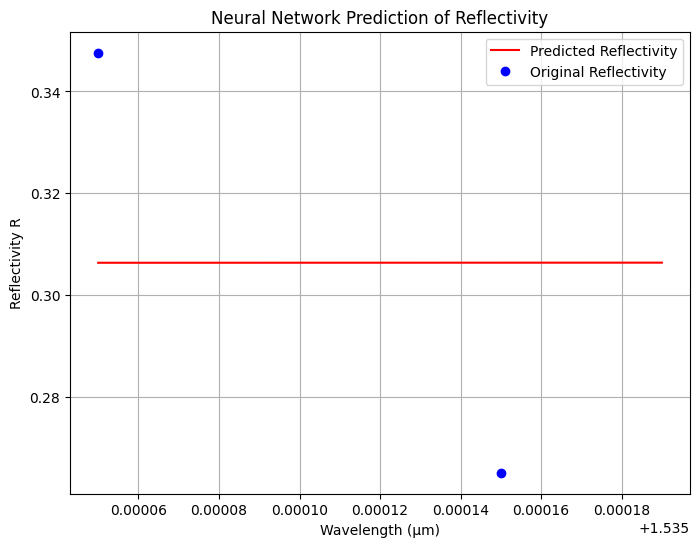

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define model parameters (same as before)
N1 = 41000  # number of periods
N2 = 30000
neff = 1.5634  # effective refractive index
d1 = 1.5352 / (4 * neff)
d2 = 1.5352 / (4 * neff)
dB = d1 + d2  # Length of single period in micron
lambdaB = 2 * neff * dB  # Bragg wavelength in micron
Lc = 50.0  # Cavity length in micron
n1 = neff
dn = 1 * 1e-4  # Delta n
n2 = n1 - dn
nc = n1  # neff in cavity = n1
n0 = 1.0
n_out = 1.0
n01_p = (n0 + n1) / (2 * n0)
n01_m = (n0 - n1) / (2 * n0)
B01 = np.array([[n01_p, n01_m], [n01_m, n01_p]])
n12_p = (n1 + n2) / (2 * n1)
n12_m = (n1 - n2) / (2 * n1)
B12 = np.array([[n12_p, n12_m], [n12_m, n12_p]])
n21_p = (n2 + n1) / (2 * n2)
n21_m = (n2 - n1) / (2 * n2)
B21 = np.array([[n21_p, n21_m], [n21_m, n21_p]])
n1t_p = (n1 + n_out) / (2 * n1)
n1t_m = (n1 - n_out) / (2 * n1)
B1t = np.array([[n1t_p, n1t_m], [n1t_m, n1t_p]])
B11 = np.array([[1, 0], [0, 1]])

# Generate synthetic data for training the model
# Here, we assume the reflectivity follows a sinusoidal pattern
# with some random noise
wavelength_train = np.arange(1.53505, 1.53520, 0.0001)
reflectivity_train = np.sin(10 * wavelength_train) + np.random.normal(0, 0.05, len(wavelength_train))

# Define and train the neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(wavelength_train, reflectivity_train, epochs=1000, verbose=0)

# Predict reflectivity using the trained model
wavelength_test = np.arange(1.53505, 1.53520, 0.00001)
reflectivity_predicted = model.predict(wavelength_test)

# Plot the original reflectivity and the predicted reflectivity
plt.figure(figsize=(8, 6))
plt.plot(wavelength_test, reflectivity_predicted, label='Predicted Reflectivity', color='red')
plt.plot(wavelength_train, reflectivity_train, 'bo', label='Original Reflectivity')
plt.xlabel('Wavelength (μm)')
plt.ylabel('Reflectivity R')
plt.title('Neural Network Prediction of Reflectivity')
plt.legend()
plt.grid(True)
plt.show()
